# J/Psi + D meson plots

In [1]:
import awkward as ak
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep

import numpy as np

plt.style.use(mplhep.style.CMS)

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [2]:
#typ: data or mc
def create_plot1d(hist1d, log=False, ax=None, typ=None):
    lumi = "x"
    
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    
    if typ == 'data':
        
        data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
        }
        ax = hist.plot1d(hist1d, error_opts=data_err_opts)
        
        # CMS style
    
        CMS = plt.text(0.03, 0.93, "CMS",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        pre = plt.text(0.03, 0.88, "Preliminary",
                      fontsize=19,
                      fontstyle='italic',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        lumi = plt.text(1., 1., r"" + lumi +  "fb$^{-1}$ (13 TeV)",
                    fontsize=18,
                    fontstyle='normal',
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )
        
        
    elif typ == 'mc':
        
        fill_opts = {
        'alpha': 0.8,
        'edgecolor':(0,0,0,.5)
        }
        
        ax = hist.plot1d(hist1d, fill_opts=fill_opts)
        
        # CMS format
        hfont = {'fontname':'Helvetica'}    
        plt.text(0.13, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure)
        plt.text(0.19, 0.89, "Simulation", fontdict=hfont, style='italic', transform=plt.gcf().transFigure)
        
    else:
        
        data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,}
        
            
        ax = hist.plot1d(hist1d, ax=ax)#, error_opts=data_err_opts)

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
    
    axis = hist1d.axes()[0]
    centers = axis.centers()
    values = np.where(hist1d.values().get(()) < 0, 0, hist1d.values().get(()))
    
    # compute mean and std:
    mean = np.sum(values*centers)/np.sum(values)
    std = np.sqrt(np.sum(values*((centers - mean)**2))/np.sum(values))
    
    annotation = TextArea(f"Total: {np.sum(values):.2e}" \
                    + "\n" + f"Mean: {mean:.2e}" \
                    + "\n" + f"Std: {std:.2e}", textprops=dict(size=14))
    
    at = AnchoredOffsetbox('upper right', child=annotation)
    at.patch.set_facecolor('None')
    ax.add_artist(at)
    
    ax.legend().remove()
    
    return ax

In [3]:
## Function to compare hists

def compare_data_mc(lumi, lb, hist_mc={}, hist_data=None, log=False, scale=None):


    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    # Data    
    if hist_data is None:
        print('No data histogram!')
    else:
        ax = hist.plot1d(
            hist_data,
            error_opts=data_err_opts,
            #stack=True,
        )
        
    for ht in hist_mc:
        fill_opts = {
        'alpha': 0.8,
        'edgecolor':(0,0,0,.5),
        'color' : hist_mc[ht],
        }
        
        
        #hist_scale_mc.scale(hist_mc[ht])
        hist.plot1d(
            ht,
            fill_opts=fill_opts,
            stack=True,
        )
        
    
    leg = ax.legend()

    CMS = plt.text(0.05, 0.93, "CMS",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
    pre = plt.text(0.05, 0.88, "Preliminary",
                      fontsize=19,
                      fontstyle='italic',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
    lumi = plt.text(1., 1., lumi,
                    fontsize=18,
                    fontstyle='normal',
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )

    handles, labels = ax.get_legend_handles_labels()
    #labels = ['$Data$','$DPS$','$SPS$', 'Bc to jpsi mu mu']#'$B_c$ $\rightarrow$ $J/\psi$ $\mu\mu$']
    labels = lb
    ax.legend(handles, labels, prop={'size': 16})

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
  
        
    return ax

In [4]:
def calc_weight_area(histogram):
    val = histogram.values()
    weight = 0
    for i in val[()]:
        weight = weight + i
    return weight**-1

# Reading data

## No special cut (Last update: vtx0p05)

In [5]:
data_file = '2017/Charmonium_2017_vtx0p05.coffea'
lumi='41.48 fb$^{-1}$'

dps_9to30_file = 'DPS/2017/9to30/DPS_vtx0p05.coffea'
dps_30to50_file = 'DPS/2017/30to50/DPS_vtx0p05.coffea'
dps_50to100_file = 'DPS/2017/50to100/DPS_vtx0p05.coffea'
#dps_100to150_file = 'DPS/2017/100to150/DPS_100to150.coffea'

sps_25to150_file = 'SPS/2017/SPS_vtx0p05.coffea'

background_bquark_jpsi_file = 'bquark/bquark_vtx0p05.coffea'
#background_bdtojpsiksphi = 'background/BdToJpsiKSPhi/data_BdToJpsiKSPhi_trigger.coffea'

## decay length < 0.06 mm (Stefanos)

In [ ]:
data_file = '2017/Charmonium_2017_dl0p06.coffea'
lumi='41.48 fb$^{-1}$'

dps_9to30_file = 'DPS/9to30/DPS_9to30_dl0p06.coffea'
dps_30to50_file = 'DPS/30to50/DPS_30to50_dl0p06.coffea'
dps_50to100_file = 'DPS/50to100/DPS_50to100_dl0p06.coffea'
dps_100to150_file = 'DPS/100to150/DPS_100to150_dl0p06.coffea'

sps_25to150_file = 'SPS/SPS_dl0p06.coffea'

background_bquark_jpsi_file = 'bquark/bquark_dl0p06.coffea'
#background_bdtojpsiksphi = 'background/BdToJpsiKSPhi/data_BdToJpsiKSPhi_trigger.coffea'

## vtxProb > 0.1 and decay length < 0.06 mm (Stefanos)

In [ ]:
data_file = '2017/Charmonium_2017_dl0p06vtxprob0p1.coffea'
lumi='41.48 fb$^{-1}$'

dps_9to30_file = 'DPS/9to30/DPS_9to30_dl0p06vtxprob0p1.coffea'
dps_30to50_file = 'DPS/30to50/DPS_30to50_dl0p06vtxprob0p1.coffea'
dps_50to100_file = 'DPS/50to100/DPS_50to100_dl0p06vtxprob0p1.coffea'
dps_100to150_file = 'DPS/100to150/DPS_100to150_dl0p06vtxprob0p1.coffea'

sps_25to150_file = 'SPS/SPS_dl0p06vtxprob0p1.coffea'

background_bquark_jpsi_file = 'bquark/bquark_dl0p06vtxprob0p1.coffea'
#background_bdtojpsiksphi = 'background/BdToJpsiKSPhi/data_BdToJpsiKSPhi_trigger.coffea'

# Associated Particles

# Comparison Monte Carlo With data

## Weights

### DPS 9 to 30 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_9to30 = 494*1e-12
Nevts_9to30=4895376 
Weight_dps_9to30=luminosity*xsec_9to30/Nevts_9to30
Weight_dps_9to30

### DPS 30 to 50 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_30to50 = 0.29*1e-12
Nevts_30to50=1095994 
Weight_dps_30to50=luminosity*xsec_30to50/Nevts_30to50
Weight_dps_30to50

### DPS 50 to 100 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_50to100 = 0.0015398*1e-12
Nevts_50to100=477085 
Weight_dps_50to100=luminosity*xsec_50to100/Nevts_50to100
Weight_dps_50to100

### DPS 100 to 150 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_100to150 = 0.0000028404*1e-12
Nevts_100to150=681385 
Weight_dps_100to150=luminosity*xsec_100to150/Nevts_100to150
Weight_dps_100to150

### SPS

In [ ]:
luminosity = 41.53/10**(-15)  
xsec_sps = 1.525e-01*1e-12
#xsec_sps = 23.88*1e-12
Nevts_sps = 110665
Weight_sps = luminosity*xsec_sps/Nevts_sps
Weight_sps

### b-quark to jpsi (NEW)

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_bjpsi = 130000*1e-12
Nevts_bjpsi = 65768289
Weight_bjpsi = luminosity*xsec_bjpsi/Nevts_bjpsi
#Weight_bjpsi = luminosity_bjpsi/Nevts_bjpsi/xsec_bjpsi
Weight_bjpsi

In [ ]:
# Bs to jpsi Ks phi (NEW)
luminosity = 41.53/10**(-15) 
xsec_bdtojpsiksphi = 14675760*1e-12
Nevts_bdtojpsiksphi = 976383
Weight_bdtojpsiksphi = luminosity*xsec_bdtojpsiksphi/Nevts_bdtojpsiksphi
Weight_bdtojpsiksphi 

In [ ]:
dps_9to30 = load(dps_9to30_file)
hist_dps_9to30 = dps_9to30['JpsiDstar']

In [ ]:
dir(dps_9to30['JpsiDstar']['Jpsi_mass'])
np.sum(dps_9to30['JpsiDstar']['Jpsi_mass'].values()[()])

In [149]:
data = load(data_file)
hist_data = data['JpsiDstar']

In [150]:
hist_data

{'Jpsi_mass': <Hist (mass) instance at 0x7f476a212280>,
 'Jpsi_p': <Hist (pt,eta,phi) instance at 0x7f4772b7d400>,
 'Jpsi_rap': <Hist (rap) instance at 0x7f4772be39d0>,
 'Jpsi_dl': <Hist (dl) instance at 0x7f47723978e0>,
 'Jpsi_dlSig': <Hist (dlSig) instance at 0x7f476a1cc340>,
 'JpsiDstar_deltarap': <Hist (deltarap) instance at 0x7f47724ffb50>,
 'JpsiDstar_deltaphi': <Hist (deltaphi) instance at 0x7f476a1ad7c0>,
 'JpsiDstar_mass': <Hist (mass) instance at 0x7f476a1ad490>,
 'JpsiDstar_pt': <Hist (pt) instance at 0x7f47729b8df0>,
 'Dstar_p': <Hist (chg,pt,eta,phi) instance at 0x7f4772792040>,
 'Dstar_rap': <Hist (chg,rap) instance at 0x7f4772bd1e80>,
 'Dstar_deltam': <Hist (chg,deltam) instance at 0x7f477278bd60>,
 'Dstar_deltamr': <Hist (chg,deltamr) instance at 0x7f477278be50>,
 'Dstar_D0dl': <Hist (chg,d0dl) instance at 0x7f47728e8100>,
 'Dstar_D0dlSig': <Hist (chg,d0dlsig) instance at 0x7f47728e8340>}

In [6]:
#def create_hist_plot(data_file, dps_9to30, dps_30to50, dps_50to100, dps_100to150, sps_25to150, bquark_jpsi, typ, area=False):
def create_hist_plot(data_file, dps_9to30, dps_30to50, dps_50to100, sps_25to150, bquark_jpsi, typ, area=False):

    data = load(data_file)

    dps_9to30 = load(dps_9to30_file)
    dps_30to50 = load(dps_30to50_file)
    dps_50to100 = load(dps_50to100_file)
    #dps_100to150 = load(dps_100to150_file)

    sps_25to150 = load(sps_25to150_file)

    bquark_jpsi = load(background_bquark_jpsi_file)
    
    hist_data = data['JpsiDstar'][typ]

    hist_dps_9to30 = dps_9to30['JpsiDstar'][typ]
    hist_dps_30to50 = dps_30to50['JpsiDstar'][typ]
    hist_dps_50to100 = dps_50to100['JpsiDstar'][typ]
    #hist_dps_100to150 = dps_100to150['JpsiDstar'][typ]
    
    
    hist_sps = sps_25to150['JpsiDstar'][typ]
    hist_bquark_jpsi = bquark_jpsi['JpsiDstar'][typ]
    
    if area:
        Weight_data = calc_weight_area(hist_data)
        hist_data.scale(Weight_data)
        
        Weight_dps_9to30 = calc_weight_area(hist_dps_9to30)
        Weight_dps_30to50 = calc_weight_area(hist_dps_30to50)
        Weight_dps_50to100 = calc_weight_area(hist_dps_50to100)
        Weight_sps = calc_weight_area(hist_sps)
        Weight_bjpsi = calc_weight_area(hist_bquark_jpsi)
  
    # Takes the number of events in data
    nevt_data = 4950 # Taken from the fit
    # Takes the numbef of events in Monte Carlo
    dps_9to30['JpsiDstar']['Dstar_deltamr']['right charge'].values()[('right charge',)]
    dps_9to30['JpsiDstar']['Jpsi_mass'].values()[()]
    
    if typ.startswith('Dstar'):
        nevts_dps9to30 = np.sum(dps_9to30['JpsiDstar'][typ].values()[('right charge',)])
        nevts_dps30to50 = np.sum(dps_30to50['JpsiDstar'][typ].values()[('right charge',)])
        nevts_dps50to100 = np.sum(dps_50to100['JpsiDstar'][typ].values()[('right charge',)])
        nevts_sps = np.sum(sps_25to150['JpsiDstar'][typ].values()[('right charge',)])
        nevts_bquark_jpsi = np.sum(bquark_jpsi['JpsiDstar'][typ].values()[('right charge',)])

    elif typ.startswith('Jpsi'):
        nevts_dps9to30 = np.sum(dps_9to30['JpsiDstar'][typ].values()[()])
        nevts_dps30to50 = np.sum(dps_30to50['JpsiDstar'][typ].values()[()])
        nevts_dps50to100 = np.sum(dps_50to100['JpsiDstar'][typ].values()[()])
        nevts_sps = np.sum(sps_25to150['JpsiDstar'][typ].values()[()])
        nevts_bquark_jpsi = np.sum(bquark_jpsi['JpsiDstar'][typ].values()[()])
    

    hist_dps_9to30.scale(nevt_data/nevts_dps9to30)    
    hist_dps_30to50.scale(nevt_data/nevts_dps30to50)    
    hist_dps_50to100.scale(nevt_data/nevts_dps50to100)
    hist_dps = hist_dps_9to30 + hist_dps_30to50 + hist_dps_50to100# + hist_dps_100to150
    
    hist_sps.scale(nevt_data/nevts_sps) #hist_sps.scale(Weight_sps*50)
    hist_bquark_jpsi.scale(nevt_data/nevts_bquark_jpsi)
    
        
    return hist_data, hist_dps, hist_sps, hist_bquark_jpsi, hist_dps+hist_sps+hist_bquark_jpsi

In [25]:
dps_9to30 = load(dps_9to30_file)

In [11]:
dps_30to50 = load(dps_30to50_file)

In [26]:
hist_dps_9to30 = dps_9to30['JpsiDstar']['JpsiDstar_mass']

In [12]:
hist_dps_30to50 = dps_30to50['JpsiDstar']['JpsiDstar_mass']

In [29]:
dps_30to50['JpsiDstar']

{'Jpsi_mass': <Hist (mass) instance at 0x7f39b13aa940>,
 'Jpsi_p': <Hist (pt,eta,phi) instance at 0x7f39b139feb0>,
 'Jpsi_rap': <Hist (rap) instance at 0x7f39b13aa580>,
 'Jpsi_dl': <Hist (dl) instance at 0x7f39b140ad00>,
 'Jpsi_dlSig': <Hist (dlSig) instance at 0x7f399d4cfd60>,
 'JpsiDstar_deltarap': <Hist (deltarap) instance at 0x7f399d4cfeb0>,
 'JpsiDstar_deltaphi': <Hist (deltaphi) instance at 0x7f39d61674f0>,
 'JpsiDstar_deltapt': <Hist (deltapt) instance at 0x7f39d6167d30>,
 'JpsiDstar_deltaeta': <Hist (deltaeta) instance at 0x7f39d6087700>,
 'JpsiDstar_mass': <Hist (mass) instance at 0x7f39d61757c0>,
 'JpsiDstar_pt': <Hist (pt) instance at 0x7f39d6175a60>,
 'Dstar_p': <Hist (chg,pt,eta,phi) instance at 0x7f39d6175f40>,
 'Dstar_rap': <Hist (chg,rap) instance at 0x7f39b13b5790>,
 'Dstar_deltam': <Hist (chg,deltam) instance at 0x7f39b13b5b80>,
 'Dstar_deltamr': <Hist (chg,deltamr) instance at 0x7f39b12c77c0>,
 'Dstar_D0dl': <Hist (chg,d0dl) instance at 0x7f39b12c77f0>,
 'Dstar_D0dlS

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$\\Delta y$', ylabel='Events'>

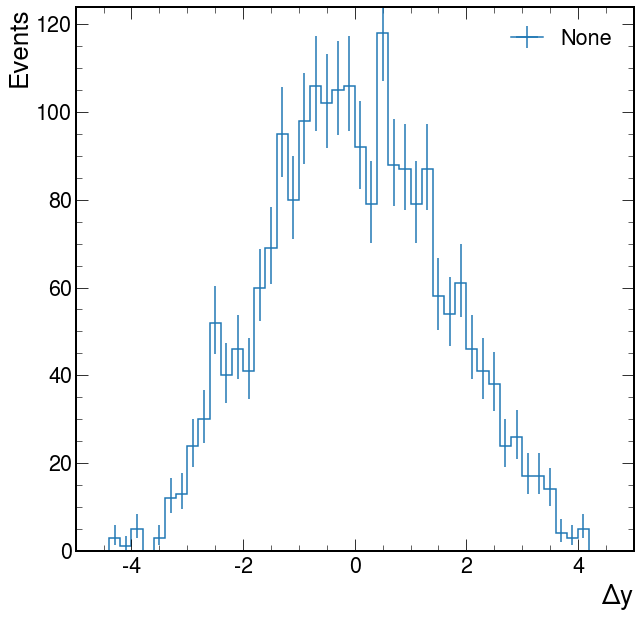

In [33]:
hist.plot1d(dps_9to30['JpsiDstar']['JpsiDstar_deltarap'])

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$\\Delta y$', ylabel='Events'>

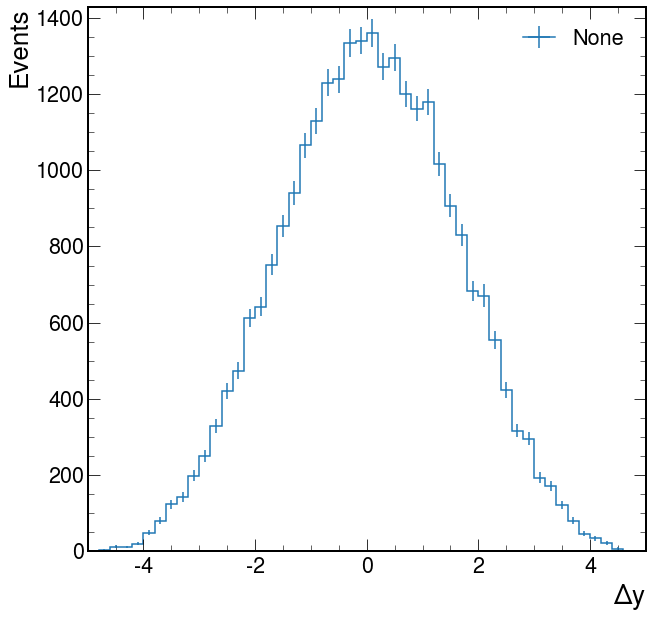

In [34]:

hist.plot1d(dps_30to50['JpsiDstar']['JpsiDstar_deltarap'])

## Variable: J/$\psi$D$^*$ invariant mass

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


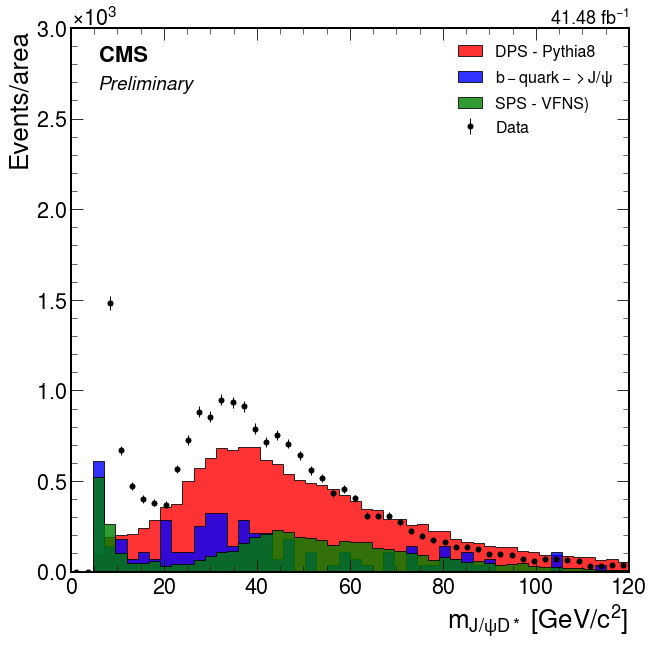

In [7]:
hist_data_invmass, hist_dps_invmass, hist_sps_invmass, hist_bquark_jpsi_invmass, total = create_hist_plot(data_file, 
                                                                                                   dps_9to30_file, 
                                                                                                   dps_30to50_file, 
                                                                                                   dps_50to100_file, 
                                                                                                   #dps_100to150_file, 
                                                                                                   sps_25to150_file, 
                                                                                                   background_bquark_jpsi_file,
                                                                                                   typ='JpsiDstar_mass',
                                                                                                   area=False) #, Data, DPS, bquark, SPS
hist_mc_invmass={hist_dps_invmass:'r',
                 hist_bquark_jpsi_invmass: 'b',
                 hist_sps_invmass: 'g',
                 }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS)','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_invmass,
                     hist_data=hist_data_invmass,)
ax.set_ylabel('Events/area')
ax.set_ylim(0, 3e3)
plt.savefig('JpsiDstar_invmass.png')

In [ ]:
hist_mc_invmass={total:'r',
                 }

labels = ['DPS+SPS+$b-quark -> J/\psi$','$Data$',]
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_invmass,
                     hist_data=hist_data_invmass,)
ax.set_ylabel('Events/bin')
ax.set_ylim(0, 3e3)
plt.savefig('JpsiDstar_invmass_allMC.png')

## Variable: J/$\psi$D$^*$ pt

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


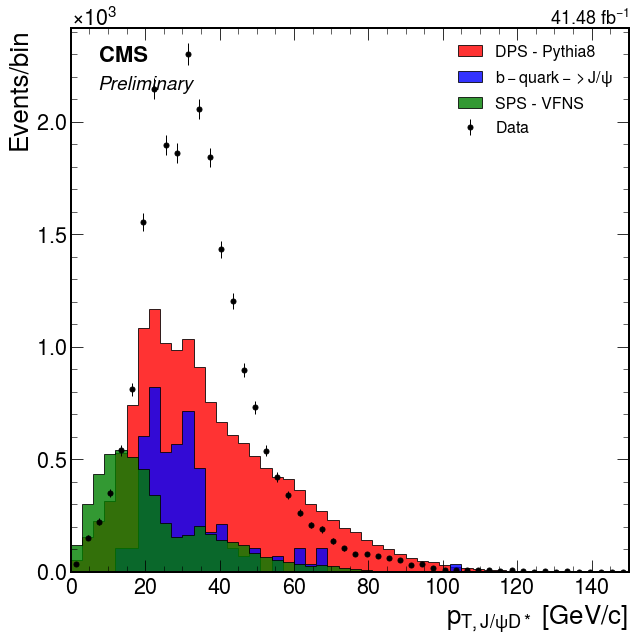

In [8]:
hist_data_ptobj, hist_dps_ptobj, hist_sps_ptobj, hist_bquark_jpsi_ptobj, total_ptobj = create_hist_plot(data_file, 
                                                                                           dps_9to30_file, 
                                                                                           dps_30to50_file, 
                                                                                           dps_50to100_file, 
                                                                                           #dps_100to150_file, 
                                                                                           sps_25to150_file, 
                                                                                           background_bquark_jpsi_file,
                                                                                           typ='JpsiDstar_pt')

hist_mc_ptobj={hist_dps_ptobj:'r',
               hist_bquark_jpsi_ptobj: 'b',
                hist_sps_ptobj: 'g',
               }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_ptobj,
                     hist_data=hist_data_ptobj,)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 9e3)
plt.savefig('JpsiDstar_pt.png')

In [ ]:
hist_mc_ptobj={total_ptobj:'r',
                 }

labels = ['DPS+SPS+$b-quark -> J/\psi$','$Data$',]
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_ptobj,
                     hist_data=hist_data_ptobj,)
ax.set_ylabel('Events/bin')
ax.set_ylim(0, 3e3)
plt.savefig('JpsiDstar_pt_allMC.png')

## Variable: $\Delta$y

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


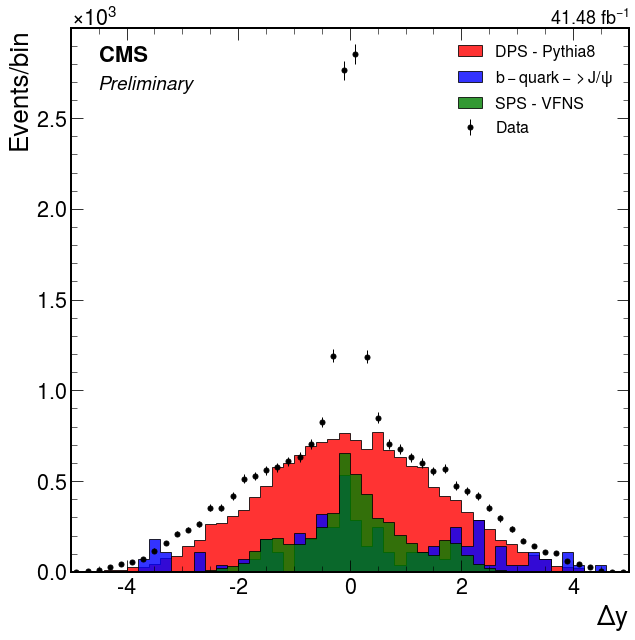

In [9]:
hist_data_deltarap, hist_dps_deltarap, hist_sps_deltarap, hist_bquark_jpsi_deltarap, total_deltarap = create_hist_plot(data_file, 
                                                                                                       dps_9to30_file, 
                                                                                                       dps_30to50_file, 
                                                                                                       dps_50to100_file, 
                                                                                                       #dps_100to150_file, 
                                                                                                       sps_25to150_file, 
                                                                                                       background_bquark_jpsi_file,
                                                                                                       typ='JpsiDstar_deltarap')

hist_mc_deltarap={hist_dps_deltarap:'r',
                  hist_bquark_jpsi_deltarap: 'b',
                  hist_sps_deltarap: 'g',
                  }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_deltarap,
                     hist_data=hist_data_deltarap,)
ax.set_ylabel('Events/bin')
#ax.set_xlim(-6, 6)
#ax.set_ylim(0, 1.1e4)
plt.savefig('JpsiDstar_deltay.png')

In [ ]:
hist_mc_ptobj={total_ptobj:'r',
                 }

labels = ['DPS+SPS+$b-quark -> J/\psi$','$Data$',]
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_ptobj,
                     hist_data=hist_data_ptobj,)
ax.set_ylabel('Events/bin')
ax.set_ylim(0, 3e3)
plt.savefig('JpsiDstar_pt_allMC.png')

## Variable: $\Delta$$\phi$

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


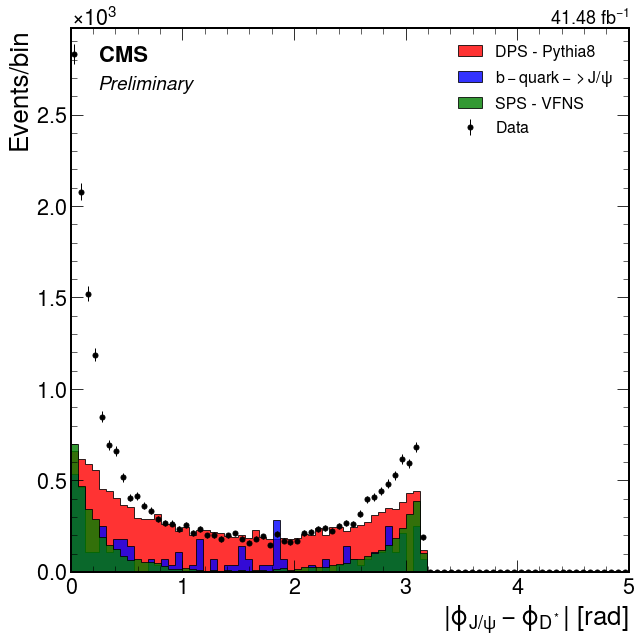

In [36]:
hist_data_deltaphi, hist_dps_deltaphi, hist_sps_deltaphi, hist_bquark_jpsi_deltaphi, total = create_hist_plot(data_file, 
                                                                                                       dps_9to30_file, 
                                                                                                       dps_30to50_file, 
                                                                                                       dps_50to100_file, 
                                                                                                       #dps_100to150_file, 
                                                                                                       sps_25to150_file, 
                                                                                                       background_bquark_jpsi_file,
                                                                                                       typ='JpsiDstar_deltaphi')

hist_mc_deltaphi={hist_dps_deltaphi:'r',
                  hist_bquark_jpsi_deltaphi: 'b',
                  hist_sps_deltaphi: 'g',
                  }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_deltaphi,
                     hist_data=hist_data_deltaphi,)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 0.9e4)
plt.savefig('JpsiDstar_deltaphi.png')

## Variable: J/$\psi$ decay length [mm]

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


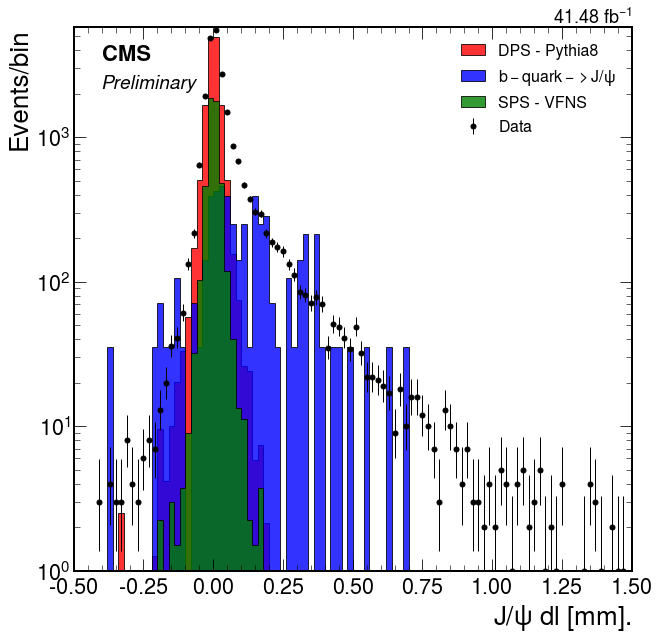

In [37]:
hist_data_dl, hist_dps_dl, hist_sps_dl, hist_bquark_jpsi_dl, total = create_hist_plot(data_file, 
                                                     
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               #dps_100to150_file, 
                                                                               sps_25to150_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_dl')

hist_mc_dl={hist_dps_dl:'r',
            hist_bquark_jpsi_dl: 'b',
            hist_sps_dl: 'g',
            }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_dl,
                     hist_data=hist_data_dl,
                     log=True)
ax.set_ylabel('Events/bin')
ax.set_xlabel('J/$\psi$ dl [mm].')
#ax.set_ylim(0, 5e4)
plt.savefig('Jpsi_decay_length.png')

## Variable: J/$\psi$ decay length significance

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


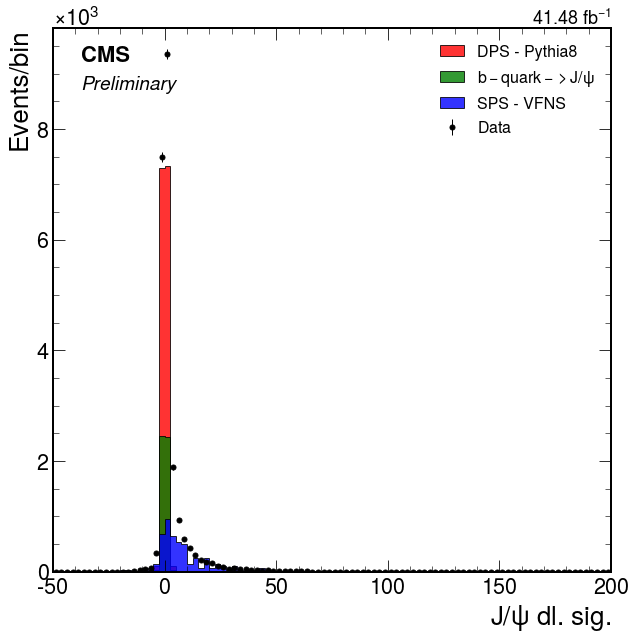

In [38]:
hist_data_dlSig, hist_dps_dlSig, hist_sps_dlSig, hist_bquark_jpsi_dlSig, total = create_hist_plot(data_file, 
                                                                                                       dps_9to30_file, 
                                                                                                       dps_30to50_file, 
                                                                                                       dps_50to100_file, 
                                                                                                       #dps_100to150_file, 
                                                                                                       sps_25to150_file, 
                                                                                                       background_bquark_jpsi_file,
                                                                                                       typ='Jpsi_dlSig')

hist_mc_dlSig={hist_dps_dlSig:'r',
                 hist_sps_dlSig: 'g',
                 hist_bquark_jpsi_dlSig: 'b'}

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_dlSig,
                     hist_data=hist_data_dlSig,)
ax.set_ylabel('Events/bin')
ax.set_xlabel('J/$\psi$ dl. sig.')
plt.savefig('Jpsi_decay_length_significance.png')

## Variable: J/$\psi$ mass

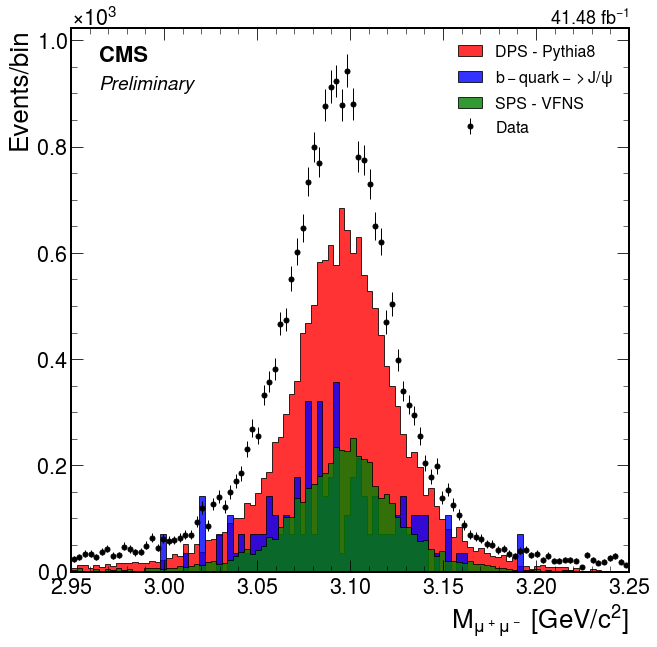

In [39]:
hist_data_mass, hist_dps_mass, hist_sps_mass, hist_bquark_jpsi_mass, total = create_hist_plot(data_file, 
                                                                                       dps_9to30_file, 
                                                                                       dps_30to50_file, 
                                                                                       dps_50to100_file, 
                                                                                       #dps_100to150_file, 
                                                                                       sps_25to150_file, 
                                                                                       background_bquark_jpsi_file,
                                                                                       typ='Jpsi_mass')

hist_mc_mass ={hist_dps_mass: 'r',
               hist_bquark_jpsi_mass: 'b',
               hist_sps_mass: 'g',
               }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_mass,
                     hist_data=hist_data_mass)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 4e3)
plt.savefig('Jpsi_mass.png')

## Variable: J/$\psi$ p$_T$

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


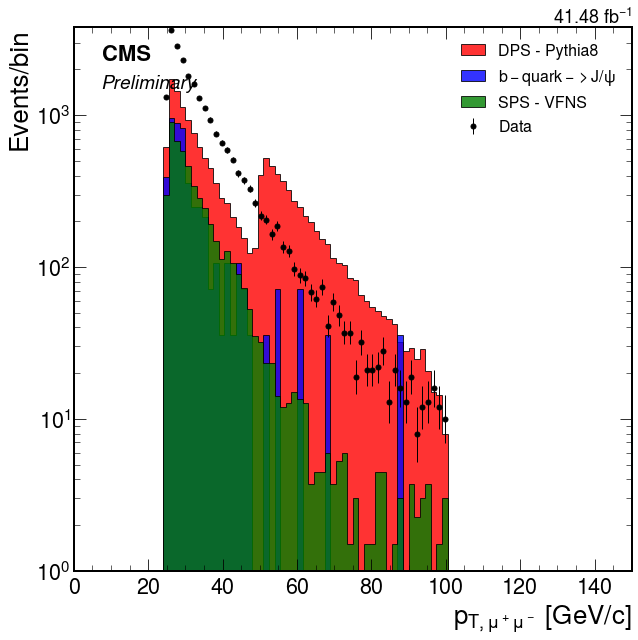

In [40]:
hist_data_pt, hist_dps_pt, hist_sps_pt, hist_bquark_jpsi_pt, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               #dps_100to150_file, 
                                                                               sps_25to150_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_p')

hist_mc_pt ={hist_dps_pt.sum('eta', 'phi'): 'r',
             hist_bquark_jpsi_pt.sum('eta', 'phi'): 'b',
             hist_sps_pt.sum('eta', 'phi'): 'g',
             }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_pt,
                     hist_data=hist_data_pt.sum('eta', 'phi'), log=True)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 15e3)
plt.savefig('Jpsi_pt.png')

## Variable: J/$\psi$ $\eta$

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


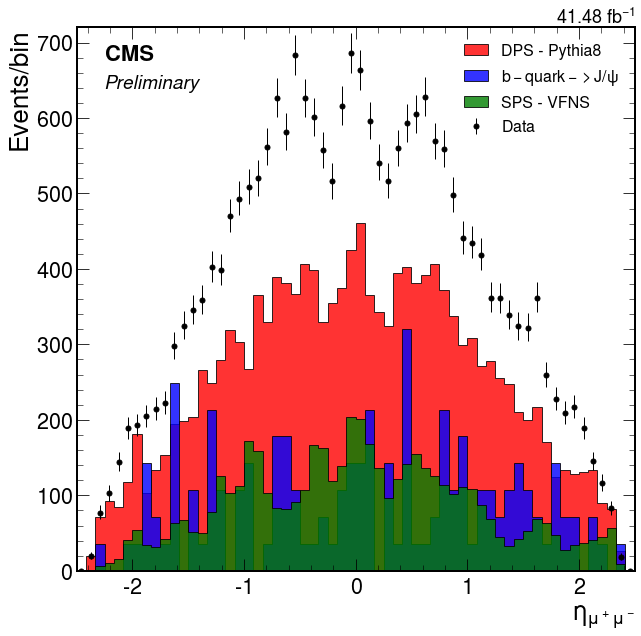

In [50]:
hist_data_eta, hist_dps_eta, hist_sps_eta, hist_bquark_jpsi_eta, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               #dps_100to150_file, 
                                                                               sps_25to150_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_p')

hist_mc_eta ={hist_dps_eta.sum('pt', 'phi'): 'r',
             hist_bquark_jpsi_eta.sum('pt', 'phi'): 'b',
             hist_sps_eta.sum('pt', 'phi'): 'g',
             }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_eta,
                     hist_data=hist_data_eta.sum('pt', 'phi'), log=False)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 15e3)
plt.savefig('Jpsi_eta.png')

## Variable: J/$\psi$ $\phi$

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


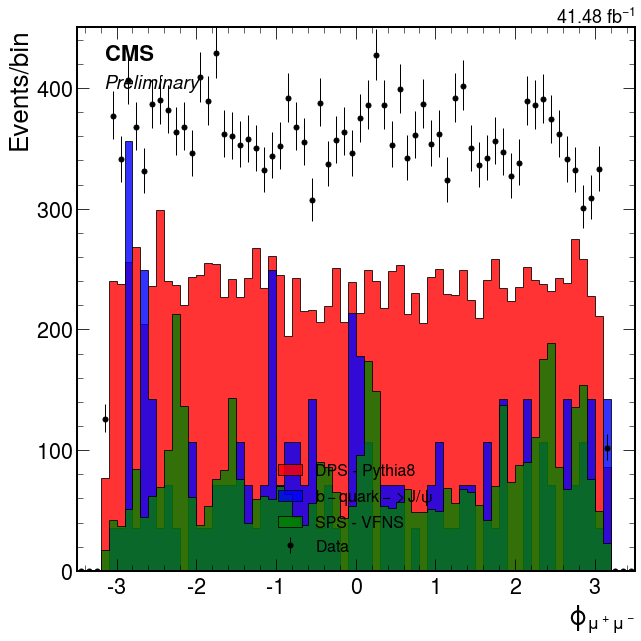

In [49]:
hist_data_phi, hist_dps_phi, hist_sps_phi, hist_bquark_jpsi_phi, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               #dps_100to150_file, 
                                                                               sps_25to150_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_p')

hist_mc_phi ={hist_dps_phi.sum('pt', 'eta'): 'r',
             hist_bquark_jpsi_phi.sum('pt', 'eta'): 'b',
             hist_sps_phi.sum('pt', 'eta'): 'g',
             }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_phi,
                     hist_data=hist_data_phi.sum('pt', 'eta'), log=False)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 15e3)
plt.savefig('Jpsi_phi.png')

## Variable: D$^*$ mass

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


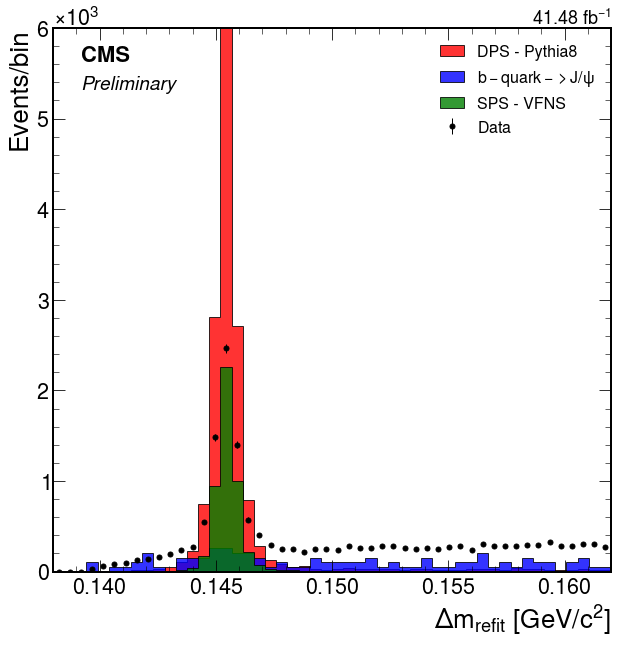

In [43]:
hist_data_mass, hist_dps_mass, hist_sps_mass, hist_bquark_jpsi_mass, total = create_hist_plot(data_file, 
                                                                                       dps_9to30_file, 
                                                                                       dps_30to50_file, 
                                                                                       dps_50to100_file, 
                                                                                       #dps_100to150_file, 
                                                                                       sps_25to150_file, 
                                                                                       background_bquark_jpsi_file,
                                                                                       typ='Dstar_deltamr')

hist_mc_mass ={hist_dps_mass: 'r',
               hist_bquark_jpsi_mass: 'b',
               hist_sps_mass: 'g',
               }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_mass,
                     hist_data=hist_data_mass)
ax.set_ylabel('Events/bin')
ax.set_ylim(0, 6e3)
plt.savefig('Dstar_deltamassr.png')

## Variable: D$^*$ p$_T$

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


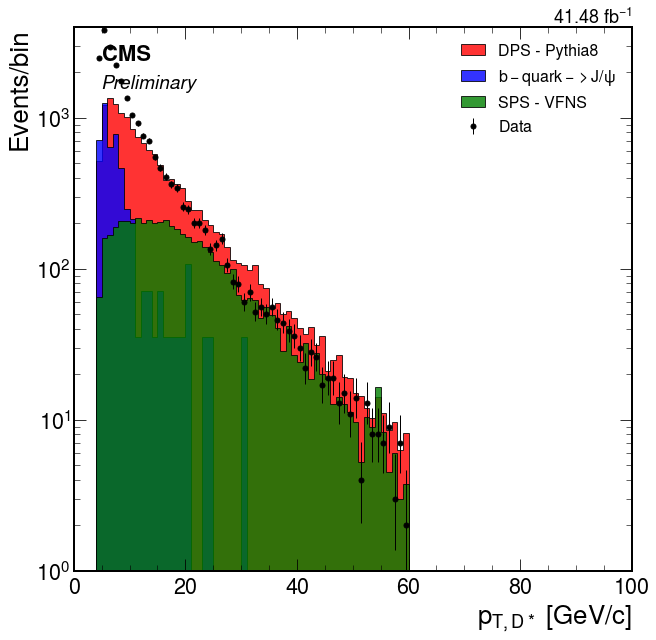

In [44]:
hist_data_pt, hist_dps_pt, hist_sps_pt, hist_bquark_jpsi_pt, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               #dps_100to150_file, 
                                                                               sps_25to150_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Dstar_p')

hist_mc_pt ={hist_dps_pt.sum('eta', 'phi'): 'r',
             hist_bquark_jpsi_pt.sum('eta', 'phi'): 'b',
             hist_sps_pt.sum('eta', 'phi'): 'g',
             }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_pt,
                     hist_data=hist_data_pt.sum('eta', 'phi'), log=True)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 15e3)
plt.savefig('Dstar_pt.png')

## Variable: D$^*$ $\eta$

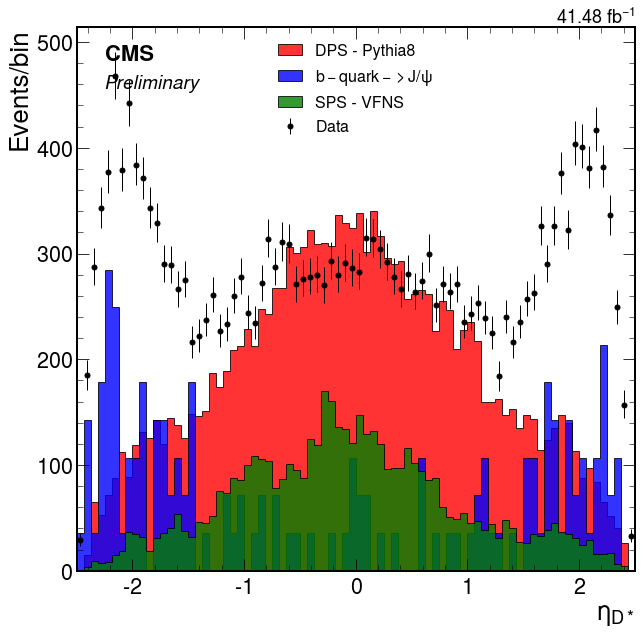

In [47]:
hist_data_eta, hist_dps_eta, hist_sps_eta, hist_bquark_jpsi_eta, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               #dps_100to150_file, 
                                                                               sps_25to150_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Dstar_p')

hist_mc_eta ={hist_dps_eta.sum('pt', 'phi'): 'r',
             hist_bquark_jpsi_eta.sum('pt', 'phi'): 'b',
             hist_sps_eta.sum('pt', 'phi'): 'g',
             }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_eta,
                     hist_data=hist_data_eta.sum('pt', 'phi'), log=False)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 15e3)
plt.savefig('Dstar_eta.png')

## Variable: D$^*$ $\phi$

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


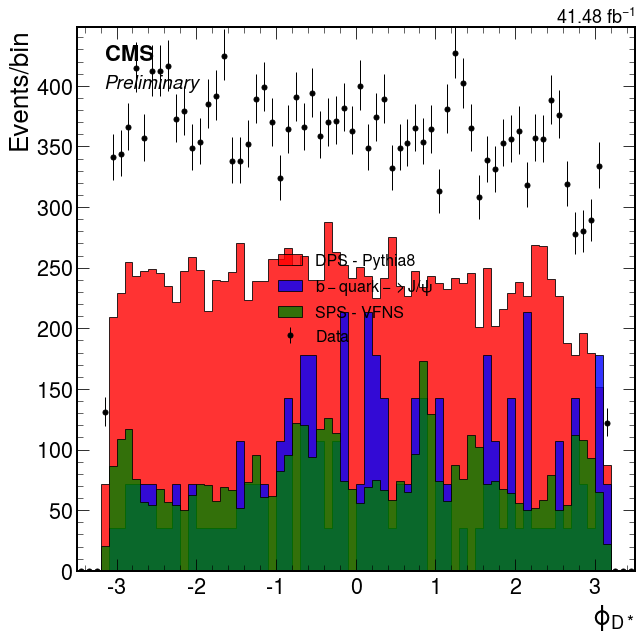

In [48]:
hist_data_phi, hist_dps_phi, hist_sps_phi, hist_bquark_jpsi_phi, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               #dps_100to150_file, 
                                                                               sps_25to150_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Dstar_p')

hist_mc_phi ={hist_dps_phi.sum('pt', 'eta'): 'r',
             hist_bquark_jpsi_phi.sum('pt', 'eta'): 'b',
             hist_sps_phi.sum('pt', 'eta'): 'g',
             }

labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - VFNS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_phi,
                     hist_data=hist_data_phi.sum('pt', 'eta'), log=False)
ax.set_ylabel('Events/bin')
#ax.set_ylim(0, 15e3)
plt.savefig('Dstar_phi.png')

In [ ]:
hist_dps_9to30

# Dedicated to tests

In [ ]:
##### DPS pT tests

In [ ]:
data = load(data_file)

dps_9to30 = load(dps_9to30_file)
dps_30to50 = load(dps_30to50_file)
dps_50to100 = load(dps_50to100_file)
dps_100to150 = load(dps_100to150_file)

hist_data = data['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')

hist_dps_9to30 = dps_9to30['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_9to30.scale(Weight_dps_9to30)

hist_dps_30to50 = dps_30to50['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_30to50.scale(Weight_dps_30to50)

hist_dps_50to100 = dps_50to100['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_50to100.scale(Weight_dps_50to100)

hist_dps_100to150 = dps_100to150['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_100to150.scale(Weight_dps_100to150)

hist_dps = hist_dps_9to30 + hist_dps_30to50 + hist_dps_50to100 + hist_dps_100to150



In [ ]:
hist_mc_pt ={hist_dps_9to30: 'r',
             hist_dps_30to50: 'g',
             hist_dps_50to100: 'b',
             hist_dps_100to150: 'k'}

labels = ['DPS - 9 to 30 GeV', 'DPS - 30 to 50 GeV' ,'DPS - 50 to 100 GeV', 'DPS - 100 to 150 GeV',  '$Data$',]

In [ ]:
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_pt,
                     hist_data=hist_data,
                     log=True)
ax.set_ylabel('Events/bin')